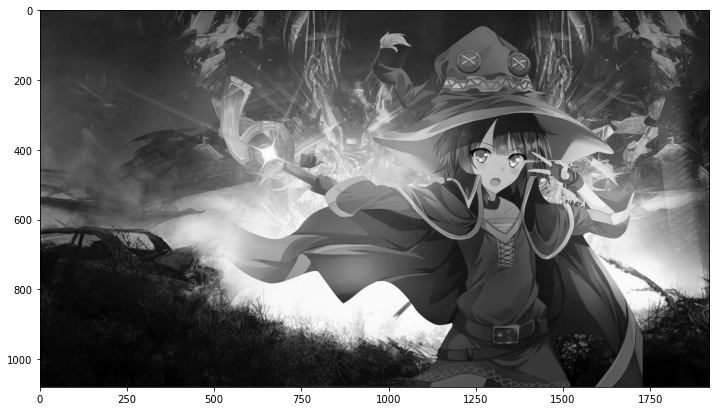

Batches per Epoch: 126.56243896484375
torch.Size([2073600, 2])
torch.Size([2073600])


In [57]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset 
from torch.utils.data.dataloader import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('images\\megumin_explosion.jpg').convert('L')
pixels = img.getdata()

width, height = img.size

x_coords = []
y_coords = []
intensity = []
for i in range(height):
    for j in range(width):
        x_coords.append(j)
        y_coords.append(height-i)
        intensity.append(pixels[i*width + j])

df = pd.DataFrame({'x': np.array(x_coords)/width, 'y': np.array(y_coords)/height, 'z': np.array(intensity)/255.})

x = np.array(x_coords).reshape((height, width))
y = np.array(y_coords).reshape((height, width))
z = np.array(intensity).reshape((height, width))

plt.figure(figsize=(12,8))
plt.imshow(img, cmap='Greys_r')
plt.show()
# plt.imshow(z, cmap='Greys_r')
# plt.show()

x_tensor = torch.tensor(df.iloc[:,0:2].values, dtype=torch.float)
y_tensor = torch.tensor(df.iloc[:,-1].values, dtype=torch.float)

# Create an instance of the dataset and dataloader
batch_size = 1024*16
dataset = TensorDataset(x_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
print('Batches per Epoch:', df.index[-1]/batch_size)

print(x_tensor.shape)
print(y_tensor.shape)

xlin = np.linspace(0, 1, width // 2)
ylin = np.linspace(0, 1, height // 2)
xv, yv = np.meshgrid(xlin, ylin)

xv_tensor = torch.tensor(xv, dtype=torch.float).flatten()
yv_tensor = torch.tensor(yv, dtype=torch.float).flatten()

reduced_tensor = torch.stack((xv_tensor, yv_tensor), dim=-1)

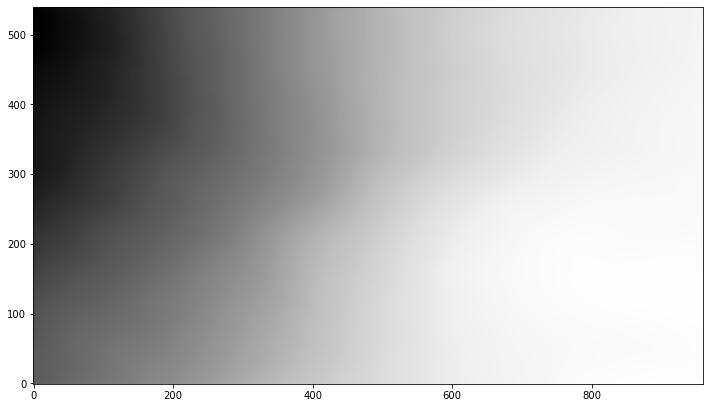

Epoch 0 of 50
Loss = 0.013891417533159256


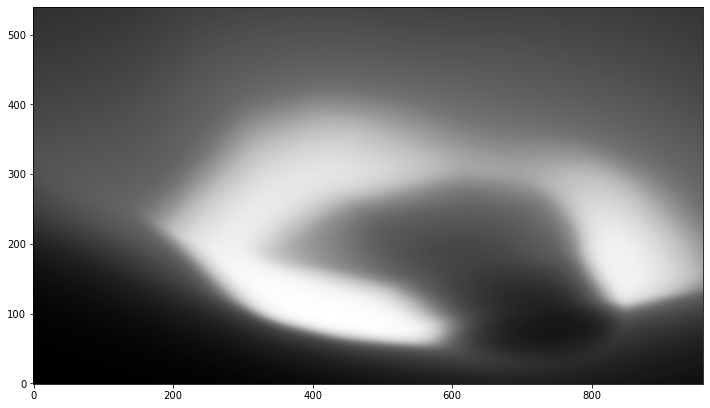

Epoch 1 of 50
Loss = 0.01095788273960352


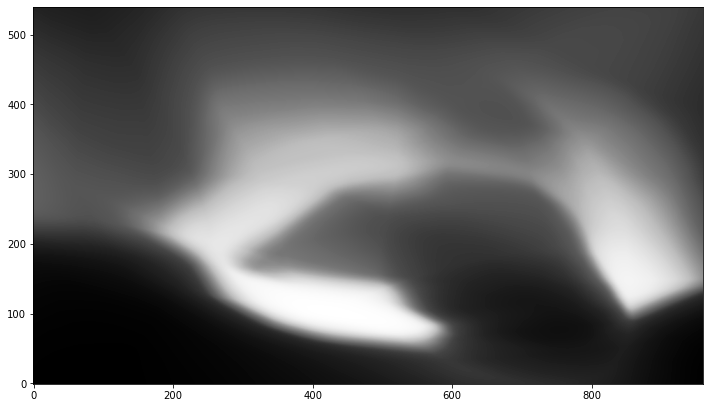

Epoch 2 of 50
Loss = 0.00984977837651968


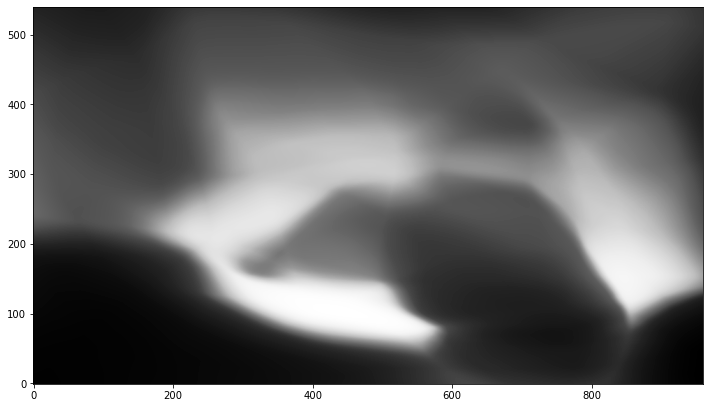

Epoch 3 of 50
Loss = 0.008736246265470982
Epoch 4 of 50
Loss = 0.009394596330821514


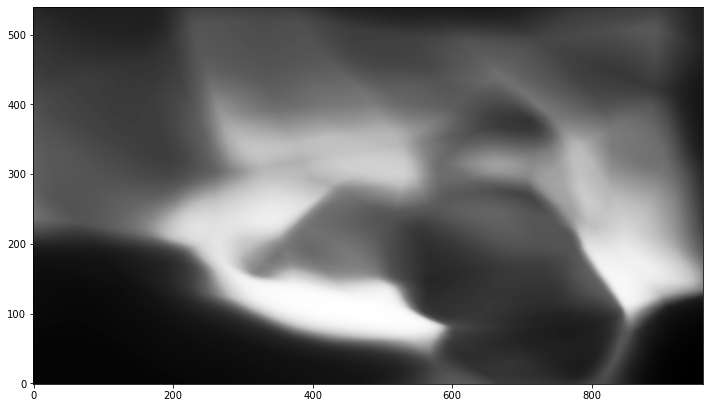

Epoch 5 of 50
Loss = 0.008413960225880146
Epoch 6 of 50
Loss = 0.008278225548565388
Epoch 7 of 50
Loss = 0.007570687681436539
Epoch 8 of 50
Loss = 0.007390385959297419
Epoch 9 of 50
Loss = 0.006812104489654303
Epoch 10 of 50
Loss = 0.006597277708351612


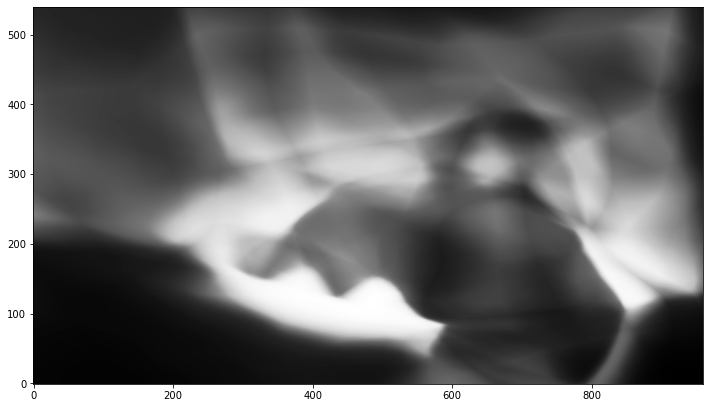

Epoch 11 of 50
Loss = 0.006804349832236767
Epoch 12 of 50
Loss = 0.006669594440609217
Epoch 13 of 50
Loss = 0.006746513303369284
Epoch 14 of 50
Loss = 0.006235409993678331
Epoch 15 of 50
Loss = 0.006246805656701326
Epoch 16 of 50
Loss = 0.006169183179736137
Epoch 17 of 50
Loss = 0.00583319878205657
Epoch 18 of 50
Loss = 0.005691052880138159
Epoch 19 of 50
Loss = 0.005676844157278538
Epoch 20 of 50
Loss = 0.0059468671679496765


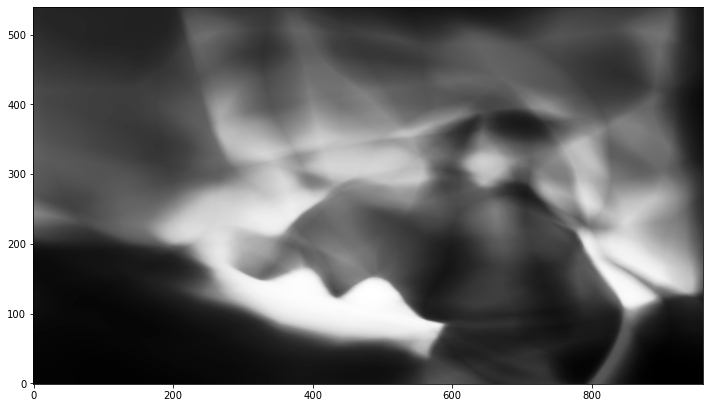

Epoch 21 of 50
Loss = 0.005940540228039026
Epoch 22 of 50
Loss = 0.006031153257936239
Epoch 23 of 50
Loss = 0.005560106597840786
Epoch 24 of 50
Loss = 0.005827959626913071
Epoch 25 of 50
Loss = 0.005880701821297407
Epoch 26 of 50
Loss = 0.0057253772392869
Epoch 27 of 50
Loss = 0.005463520996272564
Epoch 28 of 50
Loss = 0.005438441876322031
Epoch 29 of 50
Loss = 0.0055311801843345165
Epoch 30 of 50
Loss = 0.005561719182878733
Epoch 31 of 50
Loss = 0.00567301269620657
Epoch 32 of 50
Loss = 0.005789327900856733
Epoch 33 of 50
Loss = 0.005370002239942551
Epoch 34 of 50
Loss = 0.005347114987671375
Epoch 35 of 50
Loss = 0.0054743848741054535
Epoch 36 of 50
Loss = 0.005273070186376572
Epoch 37 of 50
Loss = 0.005629712715744972
Epoch 38 of 50
Loss = 0.0053301309235394
Epoch 39 of 50
Loss = 0.005266222171485424
Epoch 40 of 50
Loss = 0.005273568443953991


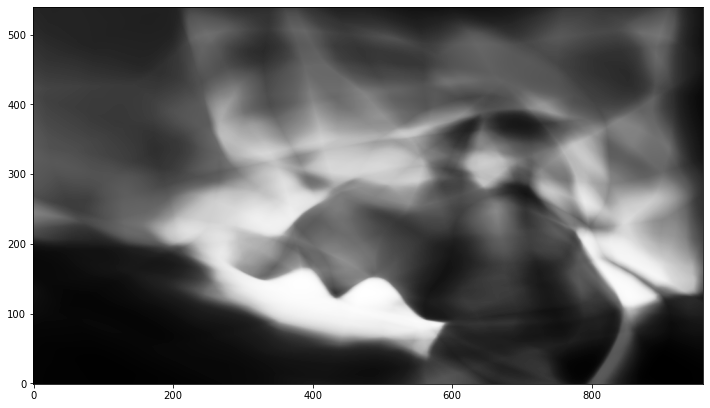

Epoch 41 of 50
Loss = 0.005315614864230156
Epoch 42 of 50
Loss = 0.0052012186497449875
Epoch 43 of 50
Loss = 0.005514390300959349
Epoch 44 of 50
Loss = 0.00520499050617218
Epoch 45 of 50
Loss = 0.005374690517783165
Epoch 46 of 50
Loss = 0.0054960064589977264
Epoch 47 of 50
Loss = 0.005367099307477474
Epoch 48 of 50
Loss = 0.005427167285233736
Epoch 49 of 50
Loss = 0.005433345679193735


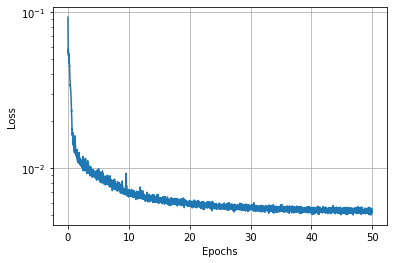

In [58]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, nn_shape=(2, 4, 100, 1)):
        super(Net, self).__init__()
        self.num_inputs = nn_shape[0]
        self.num_layers = nn_shape[1]
        self.num_neurons = nn_shape[2]
        self.num_outputs = nn_shape[3]
        self.layers = nn.ModuleList() # create an empty list to store layers
        self.layers.append(nn.Linear(self.num_inputs, self.num_neurons)) # add the first layer
        
        for i in range(self.num_layers - 2): # add the remaining layers
            self.layers.append(nn.Linear(self.num_neurons, self.num_neurons))
        
        self.layers.append(nn.Linear(self.num_neurons, self.num_outputs)) # add the output layer
    
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
        x = self.layers[-1](x)
        x = torch.sigmoid(x)
        return x
    
class AttentionNet(nn.Module):
    def __init__
    
class NeuralNetNet(nn.Module):
    def __init__(self, nn_shape=(2,4,100,1), sub_net_shape=(3,100)):
        self.num_inputs = nn_shape[0]
        self.num_layers = nn_shape[1]
        self.num_neurons = nn_shape[2]
        self.num_outputs = nn_shape[3]
        self.subnet_layers = sub_net_shape[0]
        self.subnet_neurons = sub_net_shape[1]

        self.sub_nets = nn.ModuleList() # create an empty list to store subnets
        self.sub_nets.append(Net(nn_shape=(self.num_inputs, self.subnet_layers, self.subnet_neurons, self.num_inputs*self.num_neurons)))
        for i in range(self.num_layers - 2): # add the remaining layers
            self.sub_nets.append(Net(nn_shape=(self.num_inputs, self.subnet_layers, self.subnet_neurons, self.num_neurons*self.num_neurons)))
            self.layers.append(nn.Linear(self.num_neurons, self.num_neurons))



# Create an instance of the neural network
net = Net(nn_shape=(2,6,400,1))
# net = Net(nn_shape=(2,3,100,1))

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Plot Raw Network Initialization
with torch.no_grad():
    outputs = net(reduced_tensor)
outputs = outputs.numpy()
output_grid = outputs.reshape((height//2, width//2))
plt.figure(figsize=(12,8))
plt.imshow(output_grid, cmap='Greys_r', origin='lower')
plt.show()

# Train the network for 1000 epochs
loss_values = []
n_epochs = 50
for epoch in range(n_epochs):
    for g in optimizer.param_groups:
        # g['lr'] = (0.001/n_epochs)*(n_epochs - epoch) + 0.00001
        g['lr'] = 10**(-3. - 2.*(epoch/(n_epochs-1)))
    print('Epoch', epoch, 'of', n_epochs)
    for x_batch, y_batch in dataloader:
        # Forward pass
        outputs = net(x_batch)
        loss = criterion(outputs, y_batch.unsqueeze(dim=-1))
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store the loss value
        loss_values.append(loss.item())

    # Print the loss
    print(f"Loss = {loss_values[-1]}")
    # Show current network progress
    if epoch in [0,1,2,4,10,20,40]:
        with torch.no_grad():
            outputs = net(reduced_tensor)
        outputs = outputs.numpy()
        output_grid = outputs.reshape((height//2, width//2))
        plt.figure(figsize=(12,8))
        plt.imshow(output_grid, cmap='Greys_r', origin='lower')
        plt.show()

# Save the trained model
torch.save(net.state_dict(), 'model.pt')



# Plot the loss values
epochs_values = np.array(range(len(loss_values))) / np.ceil(df.index[-1]/batch_size)
plt.plot(epochs_values, loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.grid()
plt.show()


1920 1080
Loss = 0.005433345679193735


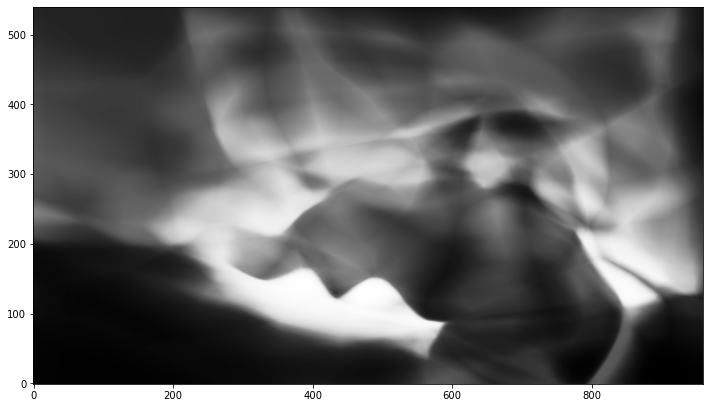

In [59]:
print(width, height)
xlin = np.linspace(0, 1, width // 2)
ylin = np.linspace(0, 1, height // 2)
xv, yv = np.meshgrid(xlin, ylin)

xv_tensor = torch.tensor(xv, dtype=torch.float).flatten()
yv_tensor = torch.tensor(yv, dtype=torch.float).flatten()

reduced_tensor = torch.stack((xv_tensor, yv_tensor), dim=-1)

# Print the loss
print(f"Loss = {loss_values[-1]}")

# with torch.no_grad():
#     outputs = net(x_tensor)
# outputs = outputs.numpy()
# output_grid = outputs.reshape((height, width))
# plt.figure(figsize=(12,8))
# plt.imshow(output_grid, cmap='Greys_r')

with torch.no_grad():
    outputs = net(reduced_tensor)
outputs = outputs.numpy()
output_grid = outputs.reshape((height//2, width//2))
plt.figure(figsize=(12,8))
plt.imshow(output_grid, cmap='Greys_r', origin='lower')

In [62]:
print(net)

Net(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=400, bias=True)
    (2): Linear(in_features=400, out_features=400, bias=True)
    (3): Linear(in_features=400, out_features=400, bias=True)
    (4): Linear(in_features=400, out_features=400, bias=True)
    (5): Linear(in_features=400, out_features=1, bias=True)
  )
)


In [61]:

print(np.log10(0.01))
print(np.log10(0.00001))
10**-2

-2.0
-5.0


0.01